In [1]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_1640\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [2]:
# Vamos a quedarnos con un dataset reducido

arbolado = arboles[['comuna','nombre_cientifico','altura_arbol','diametro_altura_pecho']]
especies = arbolado['nombre_cientifico'].value_counts().index[:3]
arbolado = arbolado[arbolado['nombre_cientifico'].isin(especies)].sample(1000)

In [3]:
arbolado.head(20)

,comuna,nombre_cientifico,altura_arbol,diametro_altura_pecho
334272,15,Fraxinus pennsylvanica,9.0,38.0
243374,12,Fraxinus pennsylvanica,15.0,40.0
204816,11,Platanus x acerifolia,23.0,87.0
52151,4,Fraxinus pennsylvanica,8.0,29.0
361374,11,Platanus x acerifolia,15.0,69.0
187169,10,Fraxinus pennsylvanica,9.0,41.0
41512,4,Fraxinus pennsylvanica,10.0,19.0
115311,7,Fraxinus pennsylvanica,9.0,31.0
190294,10,Fraxinus pennsylvanica,10.0,51.0
298929,13,Fraxinus pennsylvanica,6.0,24.0


In [74]:
arbolado.isna().sum()

comuna                   0
nombre_cientifico        0
altura_arbol             6
diametro_altura_pecho    1
dtype: int64

In [4]:
arbolado.dropna(axis=0, inplace=True)

In [5]:
y = arbolado['nombre_cientifico']
X = arbolado.drop(columns=['nombre_cientifico'])

In [6]:
y.head()

334272    Fraxinus pennsylvanica
243374    Fraxinus pennsylvanica
204816     Platanus x acerifolia
52151     Fraxinus pennsylvanica
361374     Platanus x acerifolia
Name: nombre_cientifico, dtype: object

In [7]:
X.head()

,comuna,altura_arbol,diametro_altura_pecho
334272,15,9.0,38.0
243374,12,15.0,40.0
204816,11,23.0,87.0
52151,4,8.0,29.0
361374,11,15.0,69.0


In [79]:
X.dtypes

comuna                     int64
altura_arbol             float64
diametro_altura_pecho    float64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train

,comuna,altura_arbol,diametro_altura_pecho
282523,13,12.0,34.0
206739,11,5.0,22.0
116908,8,6.0,22.0
246428,12,11.0,60.0
210677,11,8.0,20.0
...,...,...,...
261889,12,11.0,25.0
151705,9,8.0,31.0
366070,13,10.0,26.0
215327,11,8.0,0.0


In [10]:
y_train

282523    Fraxinus pennsylvanica
206739    Fraxinus pennsylvanica
116908    Fraxinus pennsylvanica
246428    Fraxinus pennsylvanica
210677    Fraxinus pennsylvanica
                   ...          
261889    Fraxinus pennsylvanica
151705    Fraxinus pennsylvanica
366070    Fraxinus pennsylvanica
215327    Fraxinus pennsylvanica
110075    Fraxinus pennsylvanica
Name: nombre_cientifico, Length: 745, dtype: object

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_max = DecisionTreeClassifier(max_depth=1)


In [24]:
tree.fit(X_train, y_train)
tree_max.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

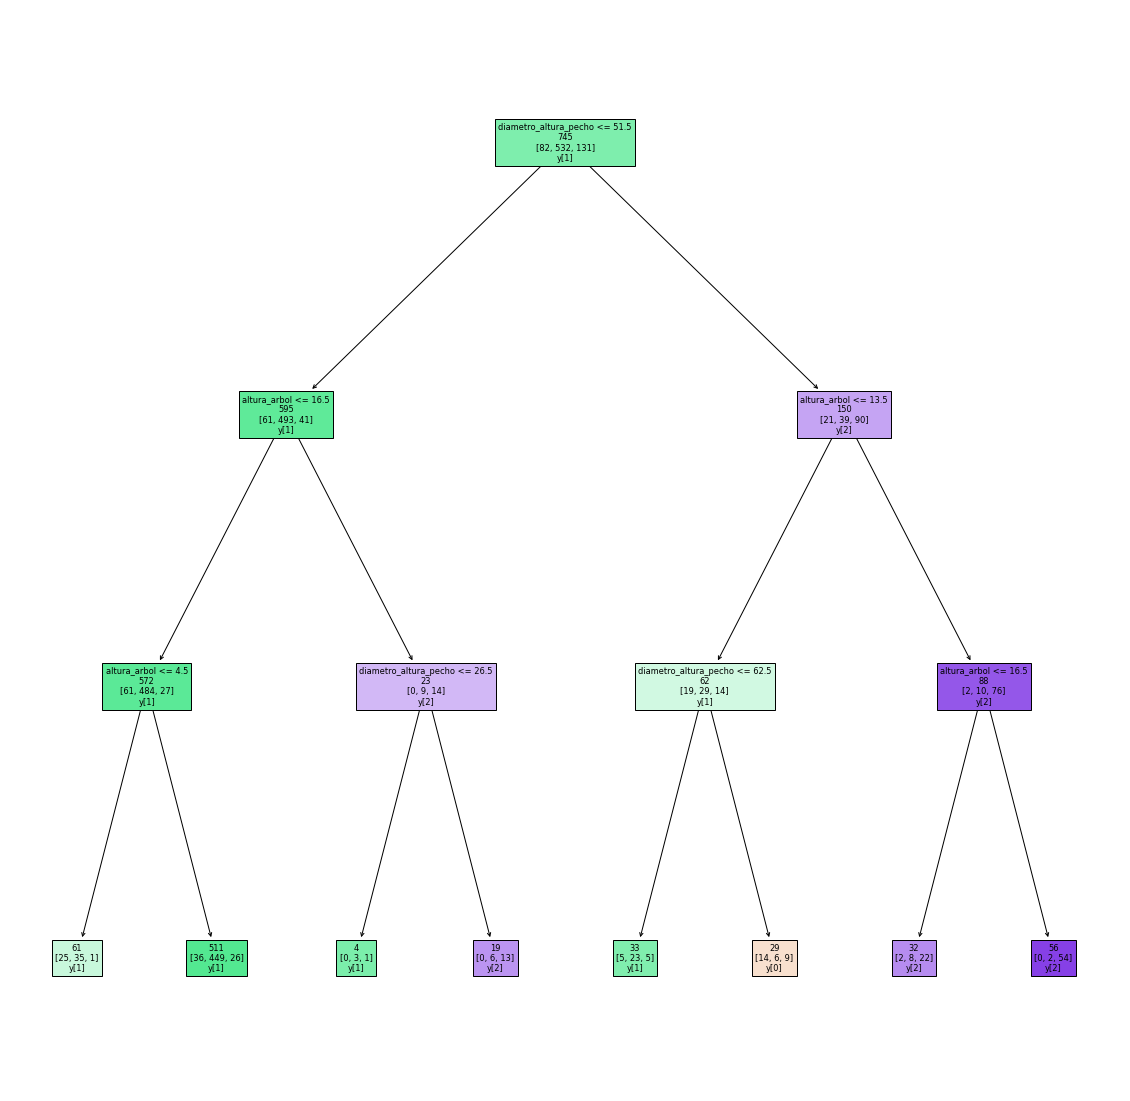

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
plot_tree(tree_max,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 
plt.show()

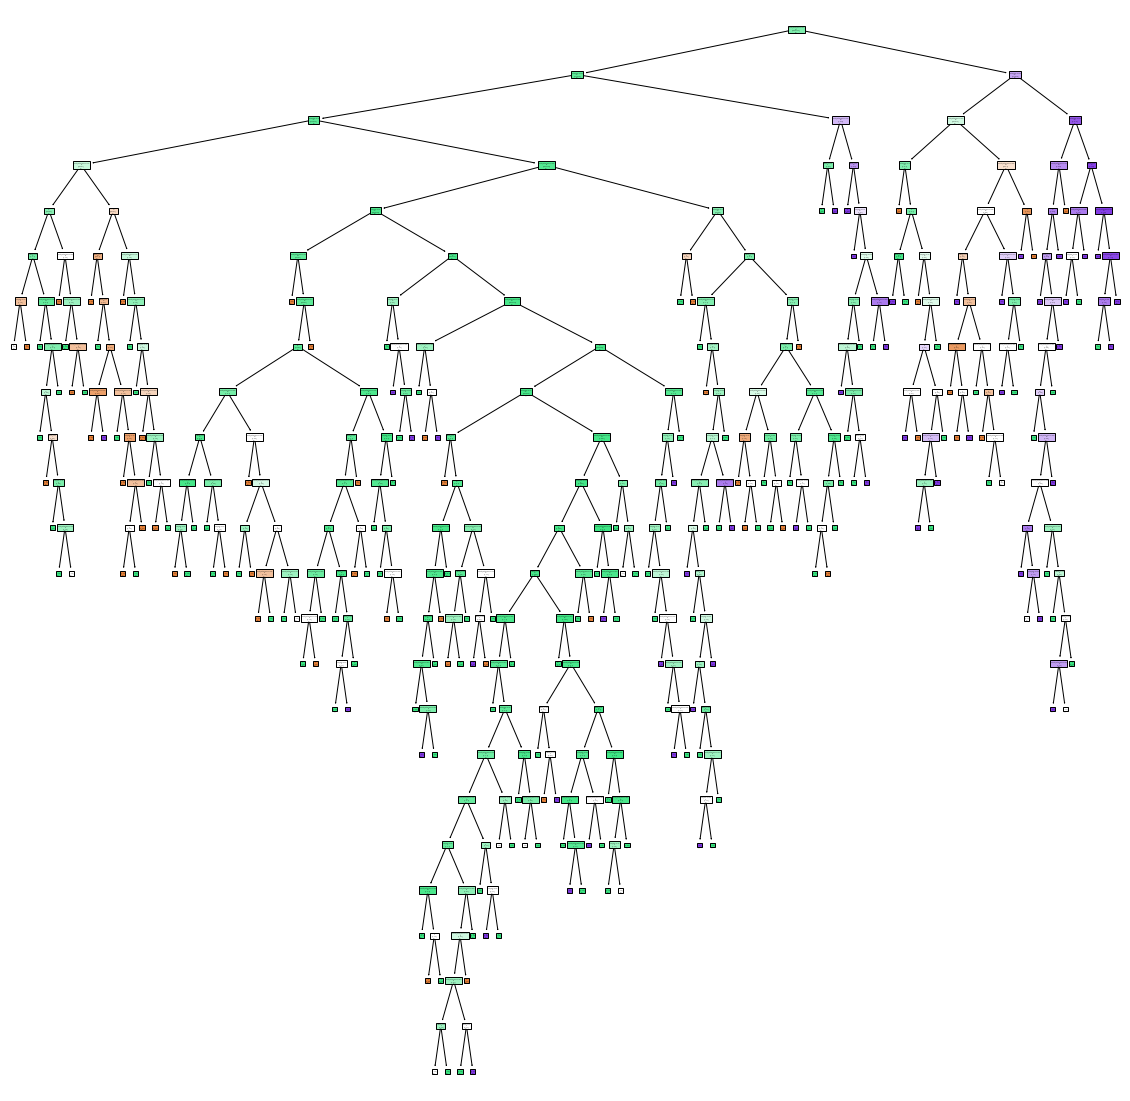

In [17]:
plt.figure(figsize=(20,20))
plot_tree(tree,feature_names=X_train.columns, filled=True, class_names=True, label=None, impurity=False) 
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
ypred = tree.predict(X_train)
ypred_max = tree_max.predict(X_train)

In [26]:
print (f'El acuracy del modelo ilimitado en nodos fue de {accuracy_score(y_train, ypred)}')
print (f'El acuracy del modelo limitado a tres nodos fue de {accuracy_score(y_train, ypred_max)}')

El acuracy del modelo ilimitado en nodos fue de 0.9852348993288591
El acuracy del modelo limitado a tres nodos fue de 0.7825503355704698


# ¿Que es mejor?

In [27]:
ypred_t = tree.predict(X_test)
ypred_max_t = tree_max.predict(X_test)

In [28]:
print (f'Si testeamos el acuracy del modelo ilimitado en nodos fue de {accuracy_score(y_test, ypred_t)}')
print (f'Si testeamos el acuracy del modelo limitado a tres nodos fue de {accuracy_score(y_test, ypred_max_t)}')

Si testeamos el acuracy del modelo ilimitado en nodos fue de 0.7068273092369478
Si testeamos el acuracy del modelo limitado a tres nodos fue de 0.7590361445783133


In [90]:
# Veamos otro modelo, el knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X_knn = X.drop(columns=['comuna'])
X_train, X_test, y_train, y_test = train_test_split(X_knn, y)
knn.fit(X_train,y_train)
ypred_knn = knn.predict(X_test)
print (f'Si testeamos el acuracy del modelo knn en sus hiperparametros default da de {accuracy_score(y_test, ypred_knn)}')



Si testeamos el acuracy del modelo knn en sus hiperparametros default da de 0.8112449799196787


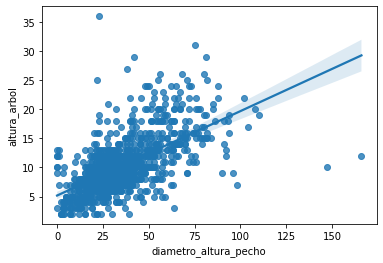

In [91]:
# Otras cosas...

import seaborn as sns

ax = sns.regplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado)

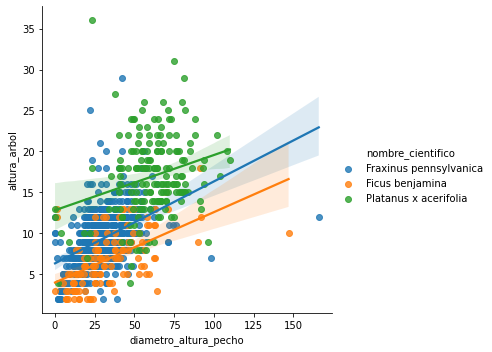

In [93]:
ax = sns.lmplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado, hue='nombre_cientifico')